In [1]:
from pathlib import Path
import os


# Establece los directorios de trabajo
current_path = "."
try:
    current_path = os.getcwd()
except:
    pass

maps_path = Path(current_path).parent.as_posix()

print(f"{current_path=}")
print(f"{maps_path=}")

current_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab/utils'
maps_path='/home/rainmaker/Documents/MINISTERIO/GITLAB/mapas_habitab'


In [2]:
import re


# Filtra archivos de departamentos por provincia
json_files = sorted([file for file in os.listdir(maps_path) if re.match(r"^\d\d_.*.json$", file)])

print(json_files)

['02_Comunas_de_Ciudad_Autonoma_de_Buenos_Aires.json', '06_Partidos_de_Buenos_Aires.json', '10_Departamentos_de_Catamarca.json', '14_Departamentos_de_Cordoba.json', '18_Departamentos_de_Corrientes.json', '22_Departamentos_de_Chaco.json', '26_Departamentos_de_Chubut.json', '30_Departamentos_de_Entre_Rios.json', '34_Departamentos_de_Formosa.json', '38_Departamentos_de_Jujuy.json', '42_Departamentos_de_La_Pampa.json', '46_Departamentos_de_La_Rioja.json', '50_Departamentos_de_Mendoza.json', '54_Departamentos_de_Misiones.json', '58_Departamentos_de_Neuquen.json', '62_Departamentos_de_Rio_Negro.json', '66_Departamentos_de_Salta.json', '70_Departamentos_de_San_Juan.json', '74_Departamentos_de_San_Luis.json', '78_Departamentos_de_Santa_Cruz.json', '82_Departamentos_de_Santa_Fe.json', '86_Departamentos_de_Santiago_del_Estero.json', '90_Departamentos_de_Tucuman.json', '94_Departamentos_de_Tierra_del_Fuego.json']


<Axes: >

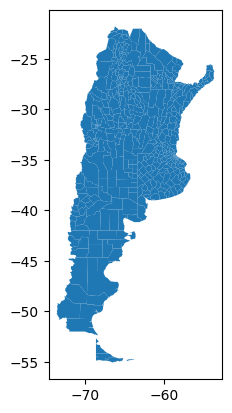

In [3]:
import geopandas
import pandas
# Concatena todos los departamentos de cada provincia en un solo mapa.
gdf = geopandas.GeoDataFrame(
    pandas.concat(
        [geopandas.read_file(os.path.join(maps_path, file)) for file in json_files],
        axis=0,
        ignore_index=True,
    ),
    crs="EPSG:4326",
    geometry="geometry",
)
# Plotea resultado
gdf.plot()

In [4]:
# Exporta el resultado
results_filename = "E0_Argentina_mapa_completo.json"
gdf.to_file(os.path.join(maps_path, results_filename), driver="GeoJSON")

/home/rainmaker/.cache/pypoetry/virtualenvs/maps-7UvcWBLF-py3.8/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [5]:
import json

dd = json.loads(gdf.to_json())

dd.update({
    "name": "E0 - Departamentos de Argentina",
    "crs": {
        "type": "Departamentos de Argentina",
        "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"},
    }
})

with open(os.path.join(maps_path, results_filename), 'w', encoding='utf-8') as json_file:
    json.dump(dd, json_file, ensure_ascii=True)